# Lectura de csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil

gas = pd.read_csv('gas_prices.csv')
fifa = pd.read_csv('fifa_data.csv')
data = pd.read_csv('Colfuturo-Seleccionados.csv')



# Plot

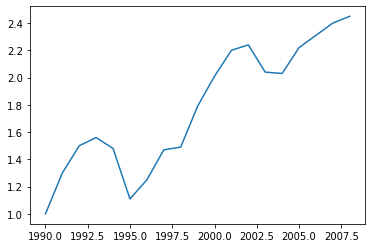

In [ ]:
# Precio del gas en mexico

plt.plot(gas.Year, gas.Mexico)

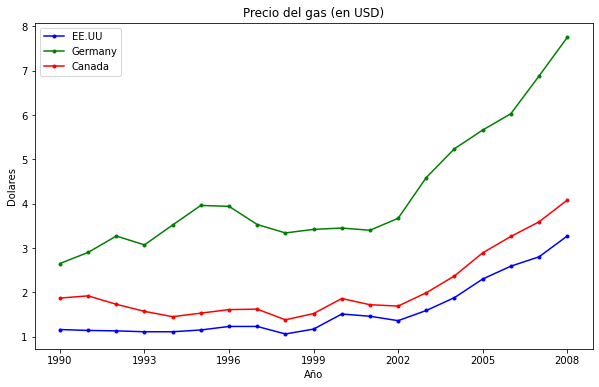

In [ ]:
# Precio del gas en varios paises

plt.figure(figsize=(10,6))
plt.title('Precio del gas (en USD)')

plt.plot(gas.Year, gas.USA, 'b.-', label='EE.UU' )
plt.plot(gas.Year, gas.Germany, 'g.-', label='Germany')
plt.plot(gas.Year, gas.Canada, 'r.-', label='Canada')

plt.xticks(gas.Year[::3])
plt.xlabel('Año')
plt.ylabel('Dolares')

plt.legend()


# Bar

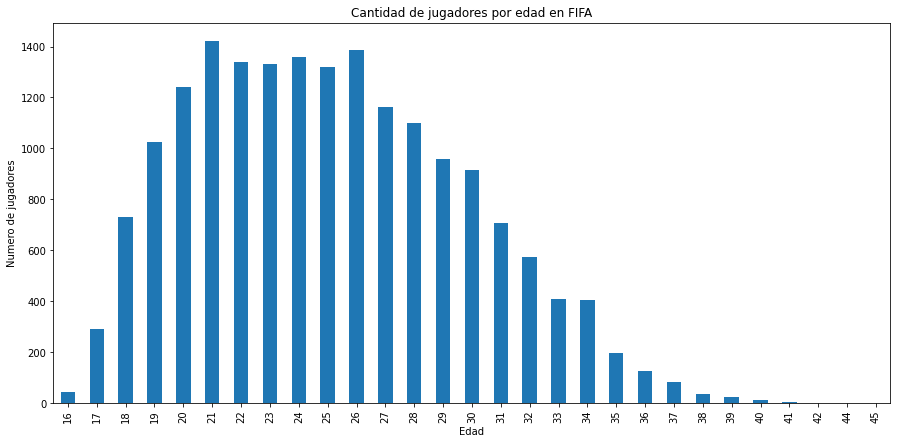

In [ ]:
# Cantidad de jugadores por edad
fifa['Age'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(15,7), ylabel='Numero de jugadores', xlabel='Edad', title='Cantidad de jugadores por edad en FIFA')

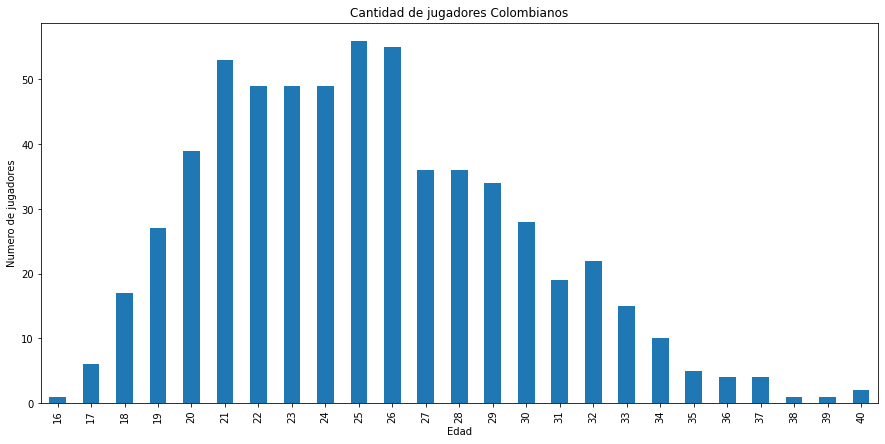

In [ ]:
# Jugadores Colombianos
fifa['Age'][fifa['Nationality']=='Colombia'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(15,7), ylabel='Numero de jugadores', xlabel='Edad', title='Cantidad de jugadores Colombianos por edad')

# Area

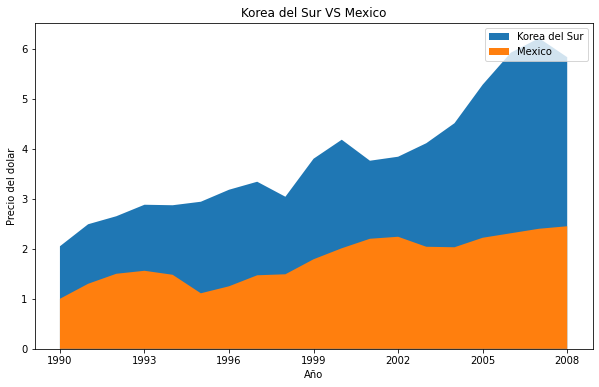

In [ ]:
# Comparacion del precio del gas entre Korea del Sur y Mexico
plt.figure(figsize=(10,6))
plt.title('Korea del Sur VS Mexico')

plt.stackplot(gas['Year'], gas['South Korea'], labels=['Korea del Sur'])
plt.stackplot(gas['Year'], gas['Mexico'], labels=["Mexico"])
#gas['South Korea'].plot.area(, )
#gas['Mexico'].plot.area(stacked=False, label='Mexico')

plt.xticks(gas.Year[::3])
plt.ylabel('Precio del dolar')
plt.xlabel('Año')
plt.legend()

# Hist

Text(0.5, 0, 'Numero de jugadores')

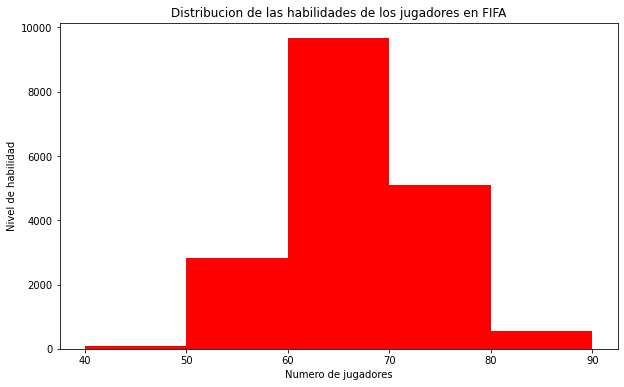

In [ ]:
# Histograma segun el promedio de habilidad
plt.figure(figsize=(10,6))
steps = [40,50,60,70,80,90]
plt.hist(fifa['Overall'], bins=steps, color='red')

plt.title('Distribucion de las habilidades de los jugadores en FIFA')
plt.ylabel('Nivel de habilidad')
plt.xlabel('Numero de jugadores')

# Box

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


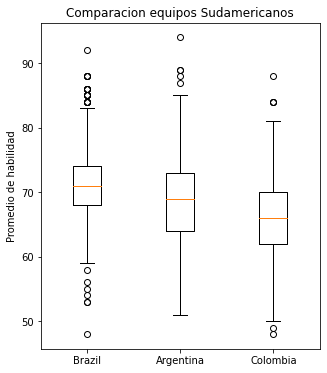

In [ ]:
# Comparacion entre los jugadores de Brazil, Argentina y Colombia

plt.figure(figsize=(5,6))

brazil = fifa.loc[fifa['Nationality']=='Brazil']['Overall']
argentina = fifa.loc[fifa['Nationality']=='Argentina']['Overall']
colombia = fifa.loc[fifa['Nationality']=='Colombia']['Overall']
etiquetas = ['Brazil', 'Argentina', 'Colombia']

plt.boxplot([brazil, argentina, colombia], labels=etiquetas)
plt.title('Comparacion equipos Sudamericanos')
plt.ylabel('Promedio de habilidad')
plt.show()

# Scatter

In [ ]:
#Filtrando por género masculino y luego conteo por universidad
S1 = data[data["Género"] == "Masculino"]
S1 = S1["Univ. Pregrado"].value_counts().sort_index(ascending=True)

#Filtrando por género femenino y luego conteo por universidad
S2 = data[data["Género"] == "Femenino"]
S2 = S2["Univ. Pregrado"].value_counts().sort_index(ascending=True)

#Crea diccionario, crea dataframe del diccionario mientras llena valores NaN con 0 y lo muestra
diccionario = {"Masculino": S1, "Femenino": S2}
scatter_graph = pd.DataFrame(diccionario).fillna(value=0)
scatter_graph


,Masculino,Femenino
Academia Charlot,1.0,0.0
Aix-Marseille Université,0.0,1.0
Benedict College,1.0,1.0
Bentley University,1.0,0.0
Bernard M. Baruch College,0.0,1.0
...,...,...
Université de Montréal,1.0,0.0
Université de Paris,1.0,0.0
Warszawska Szkola Filmowa,1.0,0.0
Westfälische Technische Hochschule Aachen (RWTH Rheinisch),1.0,0.0


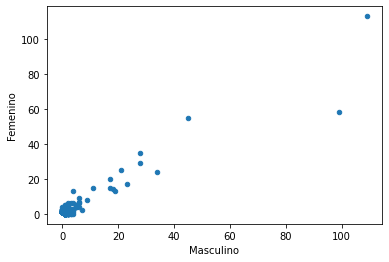

In [ ]:
#Grafica scatter con masculino en X y femenino en Y
scatter_graph.plot.scatter(x="Masculino", y="Femenino")

# Pie

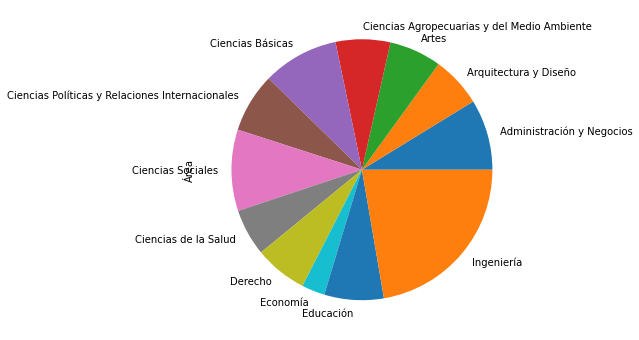

In [ ]:
#Hallando conteo de Área
pie_graph = data["Área"].value_counts().sort_index(ascending=True)

#Gráfico de pie con porcentajes de áreas del datafame
pie_graph.plot.pie(figsize=(6,6))

# Table

In [ ]:
universidades = ["Universidad de los Andes", "Universidad Nacional de Colombia (UNAL)", "Pontificia Universidad Javeriana (PUJ)"]
pais = ["Reino Unido", "EE.UU", "Alemania", "Australia", "España", "Italia", "Países Bajos"]

#universidades
table_graph = pd.DataFrame()
diccionario2 = {}

for i in range(0, len(universidades), 1):
    diccionario = data[data["Univ. Pregrado"] == universidades[i]]
    diccionario = diccionario[diccionario.País.isin(pais)]
    diccionario = diccionario["País"].value_counts().sort_index(ascending=True)
    table_graph = table_graph.append(diccionario, ignore_index=True).fillna(value=0)
    
table_graph.rename(index={0:"Universidad de los Andes",1: "Universidad Nacional de Colombia (UNAL)",2: "Pontificia Universidad Javeriana (PUJ)"}, inplace=True)
table_graph

,Alemania,Australia,EE.UU,España,Italia,Países Bajos,Reino Unido
Universidad de los Andes,20.0,10.0,78.0,9.0,7.0,7.0,66.0
Universidad Nacional de Colombia (UNAL),28.0,14.0,17.0,3.0,10.0,17.0,27.0
Pontificia Universidad Javeriana (PUJ),13.0,6.0,21.0,6.0,8.0,8.0,21.0


Text(0.5, 1.0, 'Número de estudiantes que accedieron a la beca en diferentes paises teniendo en cuenta la universidad de pregrado')

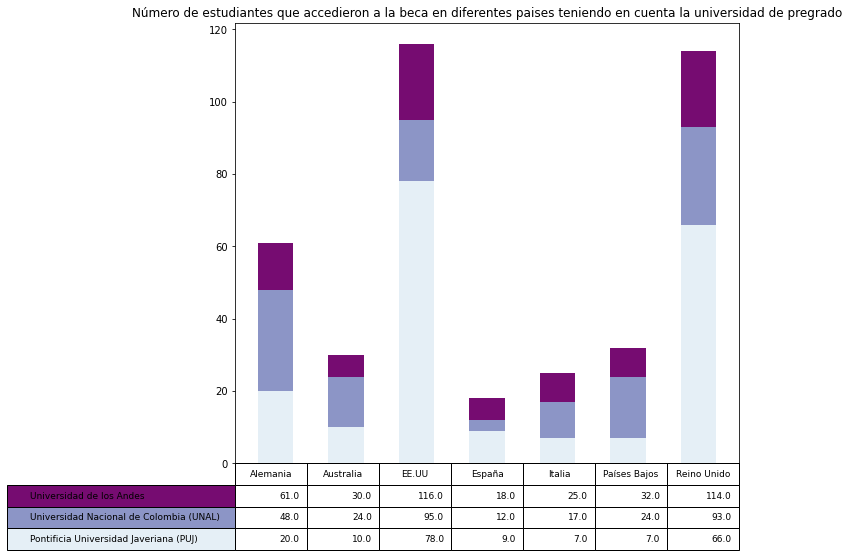

In [ ]:
#Guardando lables del data frame
datos = table_graph.values
columnas_label = table_graph.columns.tolist()
index_label = universidades

#Configuracion
bar_with = 0.5
index_position = np.arange(len(columnas_label)) * 0.2
colors = plt.cm.BuPu(np.linspace(0.1, 0.9, len(index_label)))

#Creando matplotlib grapfh
plt.figure(figsize=(10, 9))

#Retornando ceros para la construcción de las barras
y_offset = np.zeros(len(columnas_label))

#Construyendo las celdas de texto 
cell_text = []
for row_index in range(len(index_label)):
    plt.bar(columnas_label, 
          datos[row_index], 
          bar_with, bottom=y_offset,
          color=colors[row_index])

    y_offset += datos[row_index]
    #cell_text.append(['{:1.1f}'.format(y_value)for y_value in y_offset])
    cell_text.append(['{:1.1f}'.format(y_value)for y_value in y_offset])

#Invirtiendo colores y celdas de texto
colors = colors[::-1]
cell_text.reverse()

#Construyendo tabla con las células, colores, columnas y filas 
table = plt.table(cellText=cell_text,
          rowLabels=index_label,
          colLabels=columnas_label,
          rowColours=colors)

#Modificando la tabla como fuente, título, escala
table.scale(1, 2)
table.set_fontsize(12)
plt.xticks(())
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title("Número de estudiantes que accedieron a la beca en diferentes paises teniendo en cuenta la universidad de pregrado")



# Scatter Matrix


In [ ]:
scatter_matrix_graph = scatter_graph
scatter_matrix_graph

,Masculino,Femenino
Academia Charlot,1.0,0.0
Aix-Marseille Université,0.0,1.0
Benedict College,1.0,1.0
Bentley University,1.0,0.0
Bernard M. Baruch College,0.0,1.0
...,...,...
Université de Montréal,1.0,0.0
Université de Paris,1.0,0.0
Warszawska Szkola Filmowa,1.0,0.0
Westfälische Technische Hochschule Aachen (RWTH Rheinisch),1.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44a7e4d8d0>,
      dtype=object)

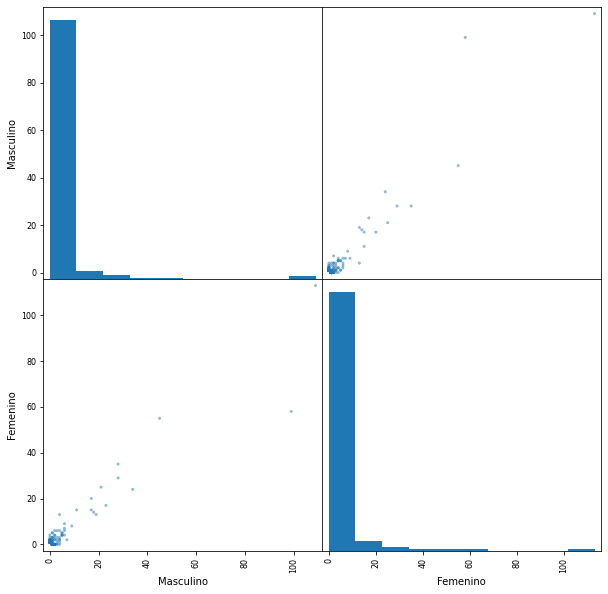

In [ ]:
pd.plotting.scatter_matrix(scatter_matrix_graph, alpha=0.5, figsize=(10,10))

# RadViz


In [ ]:
from pandas.plotting import radviz

pais = ["Reino Unido", "EE.UU", "Alemania", "Australia", "España", "Italia", "Países Bajos"]
pais.sort()
radviz_graph = pd.DataFrame(universidades, columns=["Universidades"])

for i in range(7):
  radviz_graph.insert(1,pais[i],table_graph.iloc[:,i:i+1].values)

radviz_graph

,Universidades,Reino Unido,Países Bajos,Italia,España,EE.UU,Australia,Alemania
0,Universidad de los Andes,66.0,7.0,7.0,9.0,78.0,10.0,20.0
1,Universidad Nacional de Colombia (UNAL),27.0,17.0,10.0,3.0,17.0,14.0,28.0
2,Pontificia Universidad Javeriana (PUJ),21.0,8.0,8.0,6.0,21.0,6.0,13.0


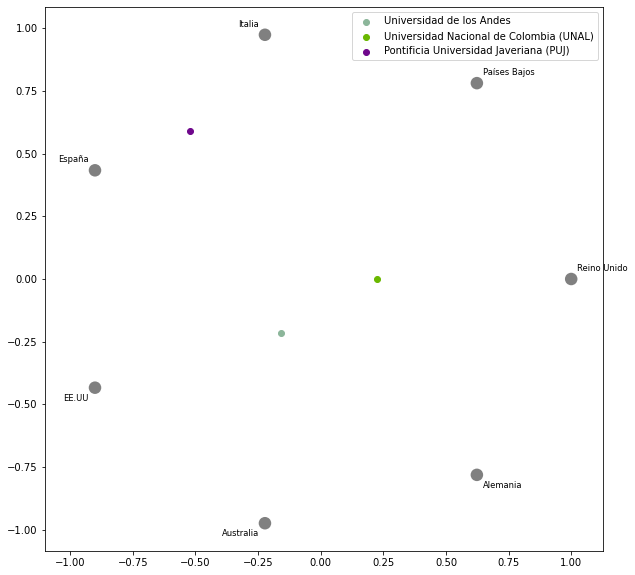

In [ ]:
plt.figure(figsize=(10,10))
radviz(radviz_graph,"Universidades")

# ColorMaps


In [ ]:
colormap_graph = table_graph
colormap_graph

,Alemania,Australia,EE.UU,España,Italia,Países Bajos,Reino Unido
Universidad de los Andes,20.0,10.0,78.0,9.0,7.0,7.0,66.0
Universidad Nacional de Colombia (UNAL),28.0,14.0,17.0,3.0,10.0,17.0,27.0
Pontificia Universidad Javeriana (PUJ),13.0,6.0,21.0,6.0,8.0,8.0,21.0


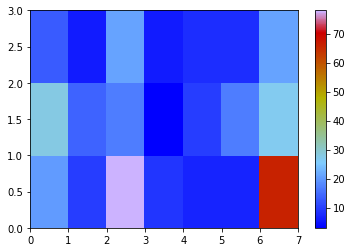

In [ ]:
from pylab import *

cdict = {'red': ((0.0, 0.0, 0.0),
                     (0.3, 0.5, 0.5),
                     (0.6, 0.7, 0.7),
                     (0.9, 0.8, 0.8),
                     (1.0, 0.8, 0.8)),
         'green': ((0.0, 0.0, 0.0),
                   (0.3, 0.8, 0.8),
                   (0.6, 0.7, 0.7),
                   (0.9, 0.0, 0.0),
                   (1.0, 0.7, 0.7)),
         'blue': ((0.0, 1.0, 1.0),
                  (0.3, 1.0, 1.0),
                  (0.6, 0.0, 0.0),
                  (0.9, 0.0, 0.0),
                  (1.0, 1.0, 1.0))}

my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
pcolor(colormap_graph,cmap=my_cmap)
colorbar()
